# Numerisk derivasjon og løsning av difflikninger
### Laget av José Tomas

In [1]:
from pylab import *
import matplotlib.image as img

### Derivasjon av bevegelse

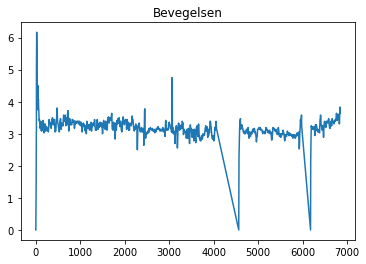

In [2]:
tid = []
fart = []
fil = open("bevegelse.txt","r")

for linje in fil:
    data = linje.split(",")
    tid.append(float(data[0]))
    fart.append(float(data[1]))

fil.close()
plot(tid,fart)
title("Bevegelsen")
show()

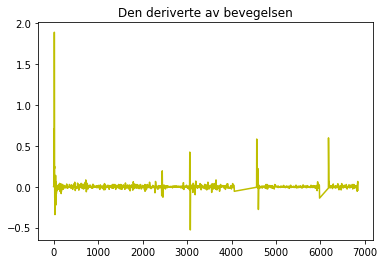

In [3]:
akkselerasjon = []

for i in range(0,len(tid)):
    akkselerasjon.append((fart[i]-fart[i-1])/(tid[i]-tid[i-1]))

plot(tid,akkselerasjon,"y")
title("Den deriverte av bevegelsen")
show()

### Derivasjon av bilde

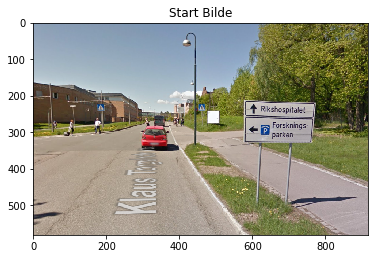

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


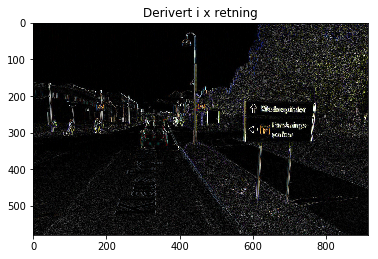

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


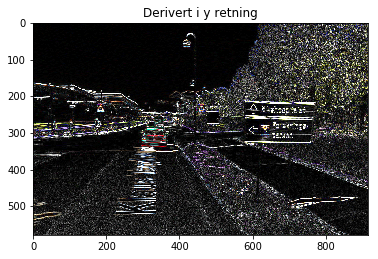

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


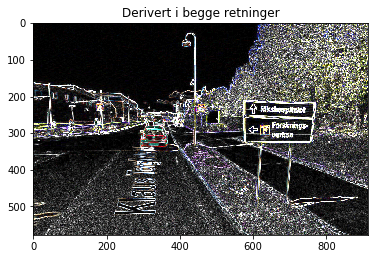

In [4]:
bilde = imread('derbilde.png')
imshow(bilde)
savefig('original.png')
title("Start Bilde")
show()

dfdx = abs(bilde[1:,2:,:] - bilde[1:,1:-1,:])
imshow(3*dfdx)
savefig("dfdx.png")
title("Derivert i x retning")
show()

dfdy = abs(bilde[1:-1, 1:, :] - bilde[2:, 1:, :])
imshow(5*dfdy)
savefig("dfdy.png")
title("Derivert i y retning")
show()

felles = abs(dfdx[2:, 1:, :] + dfdy[1:, 2:, :])
imshow(5*felles)
savefig("felles.png")
title("Derivert i begge retninger")
show()

### Differenslikning
#### Diskrete endringer

[100.         105.         110.25       115.7625     121.550625
 127.62815625 134.00956406 140.71004227 147.74554438 155.1328216
 162.88946268 171.03393581 179.5856326  188.56491423 197.99315994
 207.89281794 218.28745884 229.20183178 240.66192337 252.69501954
 265.32977051 278.59625904 292.52607199 307.15237559 322.50999437
 338.63549409 355.56726879 373.34563223 392.01291385 411.61355954
 432.19423752 453.80394939 476.49414686 500.3188542  525.33479691
 551.60153676]


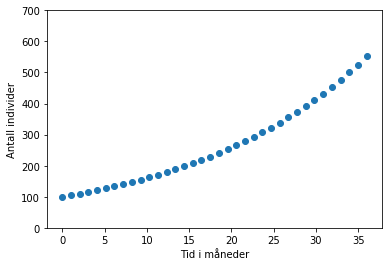

In [5]:
dt = 1E-1
P0=100
k=0.5
t =36

def difflikning(P0,dt,k,t):
    a = zeros(t,float)
    a[0]=P0
    for i in range(t-1):
        P0 += k*P0*dt
        a[i+1] = P0
    return a

print(difflikning(P0,dt,k,t))

x = linspace(0,36,36)

plot(x,difflikning(P0,dt,k,t),"o")
xlabel("Tid i måneder")
ylabel("Antall individer")
ylim(0,700)
show()

### Difflikninger
#### Populasjonsvekst i en bakteriekultur

In [ ]:
dt = 1E-8 #liten dt for å få nøyaktig svar
P0=100000
k=0.01
t = 3600*10**6

def difflikning(P0,dt,k,t):
    a = zeros(t,float)
    a[0] = P0
    for i in range(t-1):
        P0 += k*P0*dt
        a[i+1] = P0
    return a

x = linspace(0,t,t)

plot(x,difflikning(P0,dt,k,t),"m")
xlabel("Tid/s")
ylabel("Antall individer")
show()